In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import numpy as np 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv('bbc.csv')

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(df['text'])

X.shape # check shape of the document-term matrix

(2225, 1000)

In [4]:
from sklearn.decomposition import TruncatedSVD
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=100,
       random_state=122, tol=0.0)

In [11]:
terms = vectorizer.get_feature_names() 
temp = [] # used for visualization
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]# get the top 5 terms
    temp.append(sorted_terms)

In [12]:
temp[0]

[('mr', 0.24045118126629292),
 ('people', 0.1342061457785572),
 ('new', 0.13305019712414454),
 ('year', 0.12167557999981321),
 ('bn', 0.1086813700376681),
 ('film', 0.10122213668343104),
 ('government', 0.09764208002965576)]

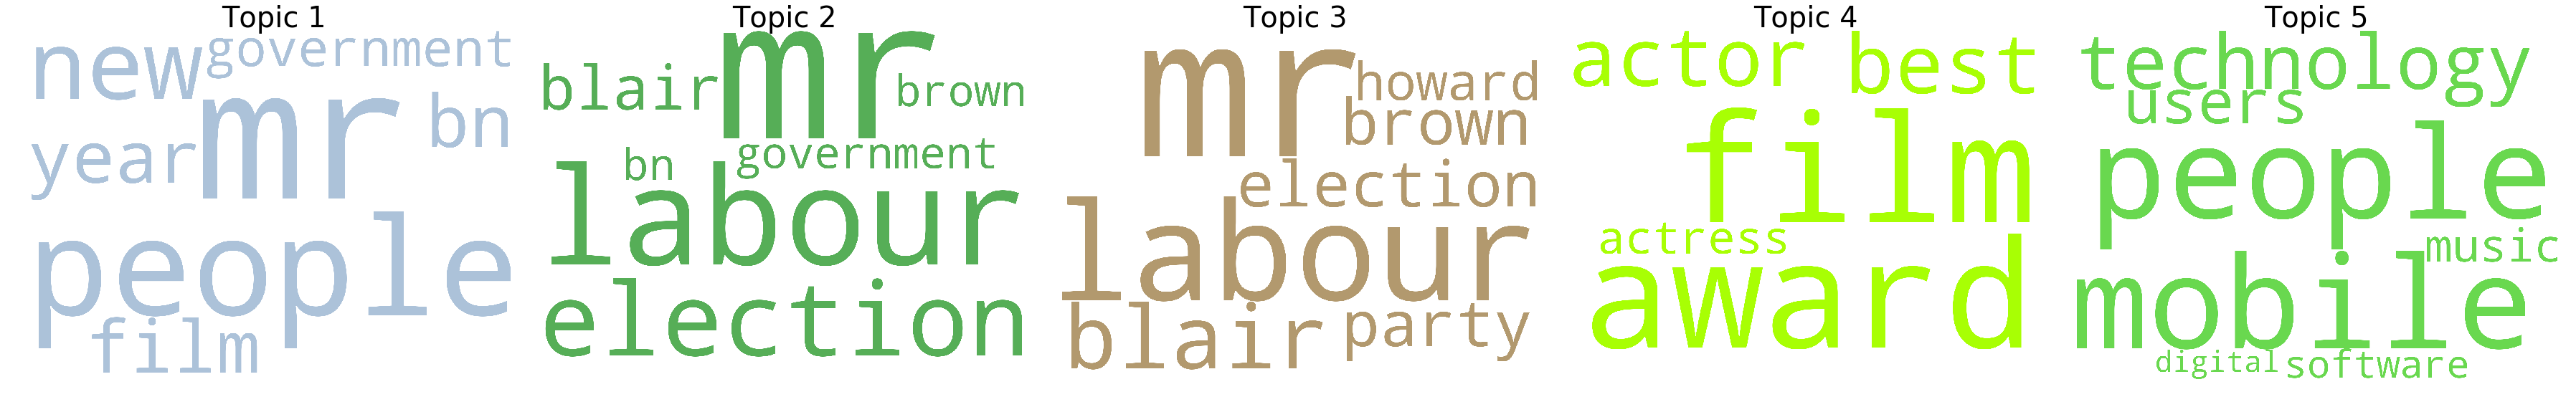

In [6]:
cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS' 导入颜色
from nltk.corpus import stopwords
cloud = WordCloud(#stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(1, 5, figsize=(50,50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_summaries = []
    for j in range(len(temp[i])):
        topic_summaries.append(temp[i][j][0])
    topic_words = " ".join(topic_summaries)
    cloud.generate_from_text(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=40))
    plt.gca().axis('off')

    


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()